In [51]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
  
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


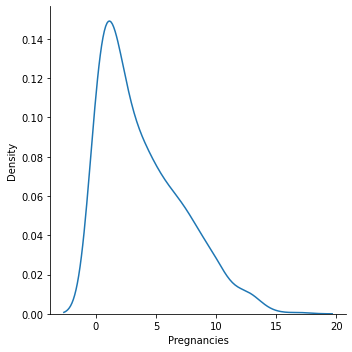

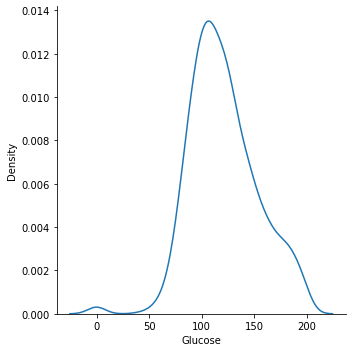

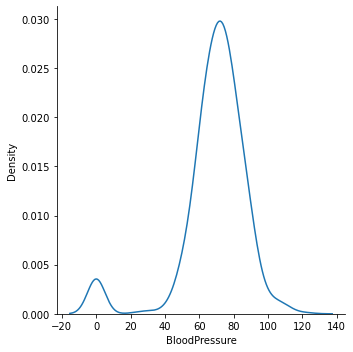

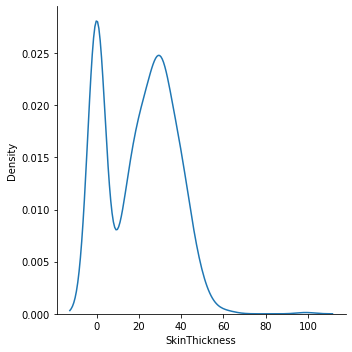

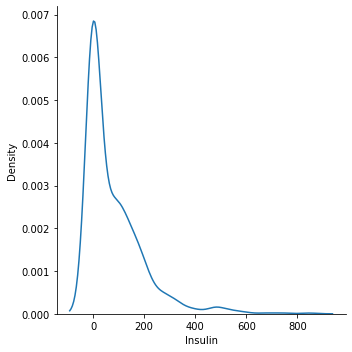

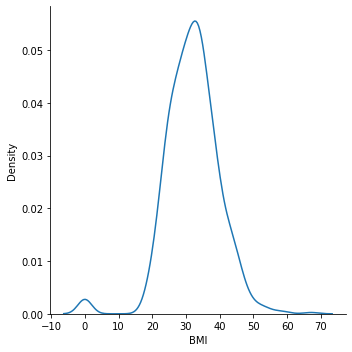

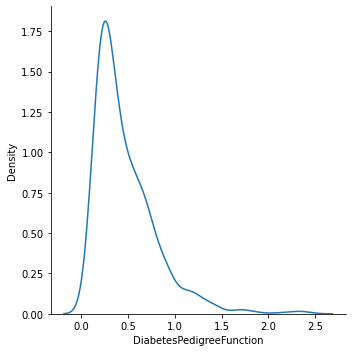

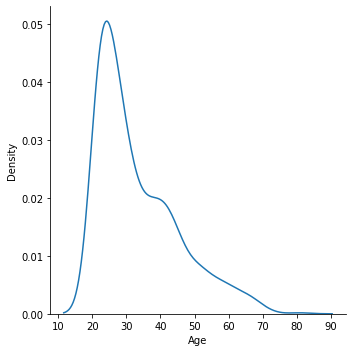

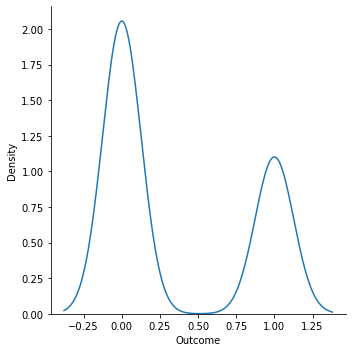

In [52]:
import seaborn as sns

for column in df.columns:
  sns.displot(df, x=df[column], kind="kde")

In [53]:
for column in df.columns:
  if column ==  'Outcome':
    break
  df[column] = df[column].replace(0, df[column].mean())

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [54]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

X = df.drop('Outcome', axis=1)
y = df['Outcome']
X.shape

(768, 8)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [62]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

/home/fonta42/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(768, 6)